In [1]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates(inplace = True)
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

type(df.job_skills[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785640 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785640 non-null  object        
 1   job_title              785639 non-null  object        
 2   job_location           784595 non-null  object        
 3   job_via                785632 non-null  object        
 4   job_schedule_type      772975 non-null  object        
 5   job_work_from_home     785640 non-null  bool          
 6   search_location        785640 non-null  object        
 7   job_posted_date        785640 non-null  datetime64[ns]
 8   job_no_degree_mention  785640 non-null  bool          
 9   job_health_insurance   785640 non-null  bool          
 10  job_country            785591 non-null  object        
 11  salary_rate            33066 non-null   object        
 12  salary_year_avg        22002 non-null   float64  

In [2]:
df_og = df.copy()

df.dropna(subset = "job_title_short", inplace = True)
df.dropna(subset = "job_skills", inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668654 entries, 1 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        668654 non-null  object        
 1   job_title              668654 non-null  object        
 2   job_location           667725 non-null  object        
 3   job_via                668646 non-null  object        
 4   job_schedule_type      658072 non-null  object        
 5   job_work_from_home     668654 non-null  bool          
 6   search_location        668654 non-null  object        
 7   job_posted_date        668654 non-null  datetime64[ns]
 8   job_no_degree_mention  668654 non-null  bool          
 9   job_health_insurance   668654 non-null  bool          
 10  job_country            668615 non-null  object        
 11  salary_rate            29800 non-null   object        
 12  salary_year_avg        20169 non-null   float64  

In [3]:
import ast
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)


In [4]:
df_ex = df.explode("job_skills")

df_ex

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [5]:
df_pivot = df_ex.pivot_table(index = "job_skills", columns = "job_title_short", aggfunc="size", fill_value = 0)

df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_skills,,,,,,,,,,
airflow,318,260,2001,25503,3915,1164,596,8694,1403,1397
airtable,17,2,88,68,65,5,10,20,10,11
alteryx,1078,28,4570,2294,2068,61,1186,467,430,115
angular,87,138,376,1446,736,92,54,303,101,2020
angular.js,0,6,2,45,12,1,0,19,0,30
...,...,...,...,...,...,...,...,...,...,...
wrike,4,1,39,6,8,0,10,0,1,4
wsl,0,0,16,16,31,3,1,2,14,13
xamarin,0,6,2,10,5,1,0,3,0,35


In [6]:
# Okay now I want to plot a bar graphs representing top 5 skills in demand for the professions 
# Data Analyst, Data Scientist, Data Engineer in a single plot

# Okay.. For that we need to understand the concept of subplots of matplotlib library
# For reference I am adding link to matplotllib docx
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Syntax : fig, ax = plt.subplot()
# fig is a variable represents the whole plot; if I want to do modification to whole plot then I will do by mentioning fig
# ax is a variable represents the individual plot(s) or subplot(s); 
#    If I want to do modification to subplot(s) then I will do by mentioning ax;
#    Infact each subplot is assigned with the index which can be called by ax[0], ax[1], ax[2], etc...; 
#    This index also act as positional index for the plots to be appeared in the figure;
#    If I want to assign a perticular index to a perticular graph, then I can do it by mention ax[index].

# Lets further understand it by plotting two simple graphs in the same figures

<Axes: xlabel='job_skills'>

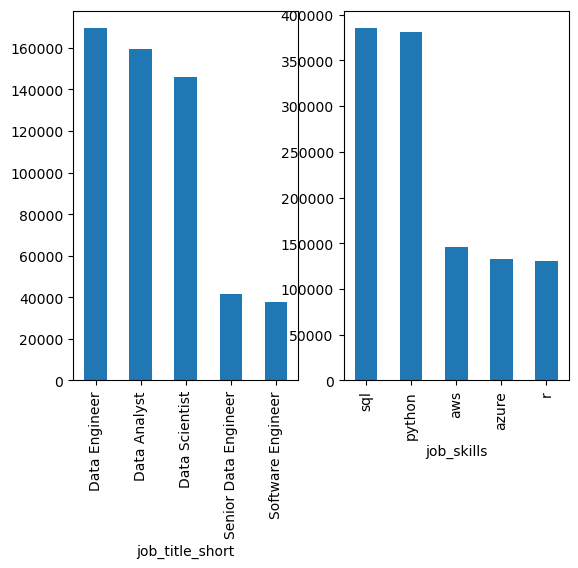

In [7]:
fig,ax = plt.subplots(1,2)

df.groupby("job_title_short").size().sort_values(ascending = False).head().plot(kind = "bar", ax= ax[0])
df_ex.groupby("job_skills").size().sort_values(ascending = False).head().plot(kind = "bar", ax = ax[1])


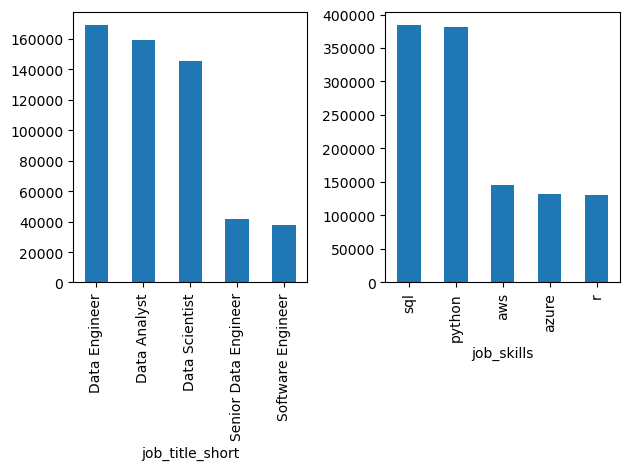

In [8]:
# Works fine, but it had some overlapping, we don't want that lets change it.

fig,ax = plt.subplots(1,2)

df.groupby("job_title_short").size().sort_values(ascending = False).head().plot(kind = "bar", ax= ax[0])
df_ex.groupby("job_skills").size().sort_values(ascending = False).head().plot(kind = "bar", ax = ax[1])

fig.tight_layout()

In [23]:
# Okays let just use the matplotlib library for plotting the same thing.

/tmp/ipykernel_15519/450328180.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[0].set_xticklabels(p.index, rotation=90)
/tmp/ipykernel_15519/450328180.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[1].set_xticklabels(p1.index, rotation=90)


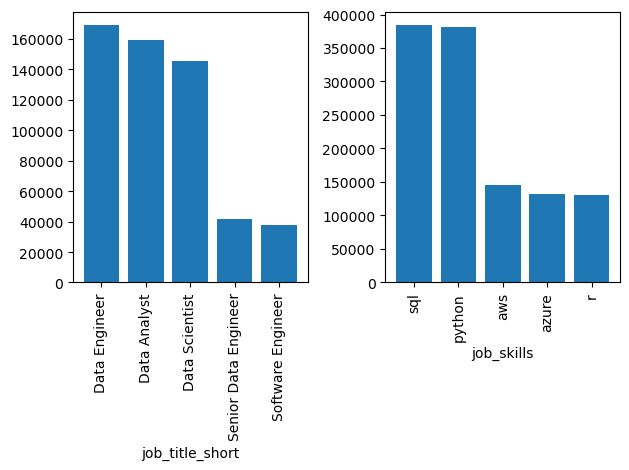

In [48]:
p = df.groupby("job_title_short").size().sort_values(ascending = False).head()
p1 = df_ex.groupby("job_skills").size().sort_values(ascending = False).head()

fig1, ax1 = plt.subplots(1,2)

ax1[0].bar(p.index, p)
ax1[0].set_xticklabels(p.index, rotation=90)
ax1[0].set_xlabel("job_title_short")
ax1[1].bar(p1.index, p1)
ax1[1].set_xticklabels(p1.index, rotation=90)
ax1[1].set_xlabel("job_skills")

fig1.tight_layout()

In [9]:
# Okay Now lets come back to the problem
# Here we want to draw three graphs so instead of creating three different codes we are going to create loop for autofills 
# lets see

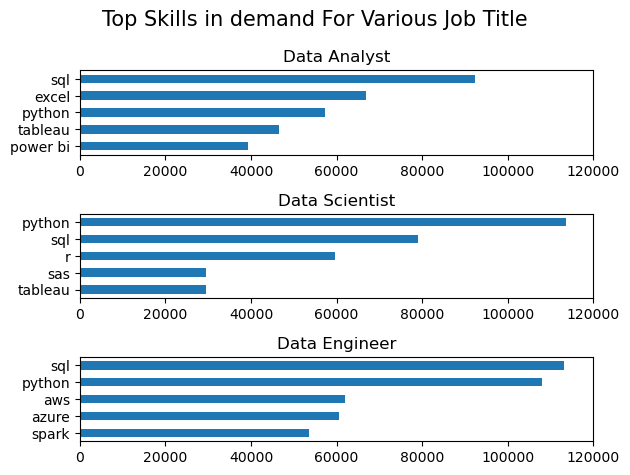

In [ ]:
job_title_list = ["Data Analyst", "Data Scientist", "Data Engineer"]

fig2, ax2 = plt.subplots(3,1)

for i, title in enumerate(job_title_list) :
    df_pivot[title].sort_values(ascending = False).head().plot(kind = "barh", ax = ax2[i])
    ax2[i].set_title(title)
    ax2[i].invert_yaxis()
    ax2[i].set_ylabel("")
    ax2[i].set_xlim(0, 120000)

fig2.suptitle("Top Skills in demand For Various Job Title", fontsize = 15)
fig2.tight_layout()

In [ ]:
# Study the above code well, it has so many functions to learn

In [49]:
# Let code the same thing but in matplotlib style

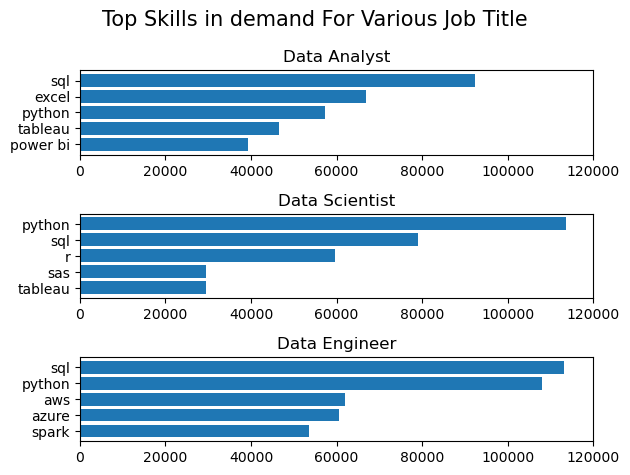

In [50]:
fig3, ax3 = plt.subplots(3,1)

for i, title in enumerate(job_title_list) :
    ax3[i].barh(df_pivot[title].sort_values(ascending = False).head().index, df_pivot[title].sort_values(ascending = False).head())
    ax3[i].set_title(title)
    ax3[i].invert_yaxis()
    ax3[i].set_ylabel("")
    ax3[i].set_xlim(0, 120000)

fig3.suptitle("Top Skills in demand For Various Job Title", fontsize = 15)
fig3.tight_layout()